# Example of fitting randomForest Model to Titanic dataset

In [2]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

# We want to see whole content (non-truncated)
pd.set_option('display.max_colwidth', None)

In [3]:
from sklearn.preprocessing import LabelEncoder
titanictrain = pd.read_csv("https://raw.githubusercontent.com/sfweller/NBSampleData/main/TitanicData/train.csv")
titanictest = pd.read_csv("https://raw.githubusercontent.com/sfweller/NBSampleData/main/TitanicData/test.csv")
    
display(titanictrain.head(n=10))

# Remove rows with missing values in training and test datasets.
titanictrain = titanictrain.dropna()
titanictest = titanictest.dropna()

titanictrain = titanictrain.set_index('PassengerId')
titanictest = titanictest.set_index('PassengerId')

# Print the number of observations in the training and test datasets.
print(len(titanictrain.index))
print(len(titanictest.index))

titanictest.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


183
87
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 904 to 1306
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    87 non-null     int64  
 1   Name      87 non-null     object 
 2   Sex       87 non-null     object 
 3   Age       87 non-null     float64
 4   SibSp     87 non-null     int64  
 5   Parch     87 non-null     int64  
 6   Ticket    87 non-null     object 
 7   Fare      87 non-null     float64
 8   Cabin     87 non-null     object 
 9   Embarked  87 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 7.5+ KB


In [4]:
from sklearn.model_selection import train_test_split

# Convert string columns to categorical for modelling phase
cat_cols = ['Pclass', 'Sex', 'Embarked']
train = pd.get_dummies(columns=cat_cols, data=titanictrain, drop_first=True)
test = pd.get_dummies(columns=cat_cols, data = titanictest, drop_first=True)

target = train['Survived']

#Y_train = titanictrain['Survived']
#Y_test = titanictrain['Survived']

# Display trainings dataset with one-hot encoded variables.
display(train.head(n=10))

# Drop target column and predictors not used in modelling from trainings and test X dataframes.
train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Split the data into training and test datasets
X = train.values
y = target.values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,0,1,0,1
11,1,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,0,1,0,0,1
12,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,0,0,0,0,1
22,1,"Beesley, Mr. Lawrence",34.0,0,0,248698,13.0000,D56,1,0,1,0,1
24,1,"Sloper, Mr. William Thompson",28.0,0,0,113788,35.5000,A6,0,0,1,0,1
28,0,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,0,0,1,0,1
53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,PC 17572,76.7292,D33,0,0,0,0,0


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Fit a randomForest model with 500 trees
titforest = RandomForestClassifier(random_state=1, n_estimators=500)
titforest.fit(X_train, Y_train)

# Compute model predictions on test data
y_preds = titforest.predict(X_test)

#Compute and print model accuracy
modelacc = accuracy_score(Y_test, y_preds)
print("RandomForest Model Accuracy: ", modelacc)

# Print confusion matrix
print("\nConfusion Matrix: ", confusion_matrix(Y_test, y_preds))



RandomForest Model Accuracy:  0.7027027027027027

Confusion Matrix:  [[ 5  7]
 [ 4 21]]


In [6]:
import time
import numpy as np

start_time = time.time()
importances = titforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in titforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.042 seconds


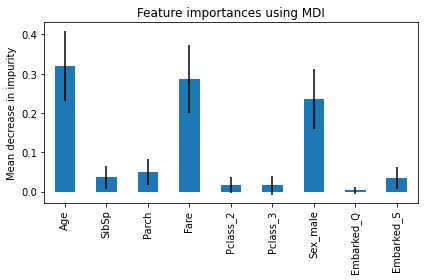

In [7]:
forest_importances = pd.Series(importances, index=train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#...Now let's see how the RandomForest model comapres with Logistic Regression Results
#...I will use the statsmodels package, because it reports P-values, unlike scikitlearn.


In [18]:
import statsmodels.api as sm

# Set maxiter to a high value for a good comparison to RandomForest model. Default is only 35 iterations.
titanic_log_reg = sm.Logit(Y_train, X_train).fit(masxiter=500)

# performing predictions on the test datdaset
yhat = titanic_log_reg.predict(X_test)
predictions = list(map(round, yhat))

# comparing original and predicted values of y
print('Actual values', list(Y_test))
print('Predictions :', predictions)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(Y_test, predictions))

# printing the summary table
print(titanic_log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.510107
         Iterations 7
Actual values [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
Predictions : [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Test accuracy =  0.7027027027027027
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  146
Model:                          Logit   Df Residuals:                      137
Method:                           MLE   Df Model:                            8
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.1945
Time:                        13:06:28   Log-Likelihood:                -74.476
converged:                       True   LL-Null:                       -92.462
Covariance Type:            nonrobust   LLR p-value:     

In [19]:
# Results:  We can see from above that the Logistic Regression achieves essentially the same
# accuracy as the RandomForest model, but that the important factors are different.
# From above, logistic regression indicates that factor 'x4'(Fare) and factor 'x7(Sex)' are important
# and meet the 5% P-value threshold. The RandomForest model in addition concluded that 'Age' was also
# an important factor in determining which passengers survived.  In conclusion, this warrants further 
# EDA exploratory analysis.





[[ 7  5]
 [ 6 19]]
